我们要完成一次 Berlekamp 译码算法的仿真，参数如下：

- 信道类型：
    - 加性高斯白噪声 ( Additional Gaussian White Noise， AWGN )
- 调制方式：
    - BPSK
- 编码方式
    - RS ( 255, 239, 17 )
    - RS ( 255, 223, 33 )
    - Raw BPSK
- $E_b / N_0$
    - RS ( 255, 239, 17 ) : 4.0 ~ 7.5 dB
    - RS ( 255, 223, 33 ) : 4.0 ~ 7.0 dB 
- 仿真次数
    - 初始为 1e5 个块，以后每增加 1 dB 增加 10 倍。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import RS255

In [2]:
def EbN02Amp(EbN0db, N0, num_n, num_k):
    EbN0 = 10 ** (EbN0db / 10.0)
    Eb = EbN0 * N0
    return np.sqrt(2 * Eb / num_n * num_k)

为了保证 $Eb/N0$ 换算成星座映射的幅值是正确的，首先对BPSK的误码率进行仿真分析。

In [3]:
sim_psk_db = np.arange(0, 10.5, 0.5)
N0 = 1.0
amp = EbN02Amp(sim_psk_db, N0, 1, 1)
ber_psk = np.zeros(amp.shape)
bit_num = 10000000

for index, value in enumerate(amp):
    sequence_received = (np.random.randn(bit_num) * np.sqrt(N0) - value) > 0
    error_num = np.sum(sequence_received)
    ber_psk[index] = error_num / bit_num
    

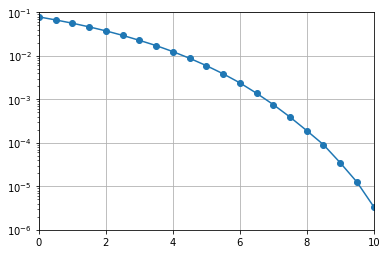

In [4]:
plt.semilogy(sim_psk_db, ber_psk, marker="o")
plt.grid(True)
plt.xlim(0, 10)
plt.ylim(1e-6, 1e-1)
plt.show()

可以看到误码率为 1e-5 的时，$E_b / N_0$ 大概为 9.6 dB。

之后对 RS(255, 255, 239, 17) 的误符号率和误块率进行统计。

In [ ]:
db_255_239_17 = np.arange(4.0, 8.0, 0.4)
seq_num_255_239_17 = [100, 100, 100, 100, 100, 100, 500, 5000, 50000, 800000]
amp = EbN02Amp(db_255_239_17, N0, 255, 239)
SER_255_239_17 = np.zeros(db_255_239_17.shape)
BLER_255_239_17 = np.zeros(db_255_239_17.shape)
for index, value in enumerate(amp):
    symbol_num = 0
    block_num = 0
    se_num = 0
    ble_num = 0
    print("db = ", db_255_239_17[index])
    for k in range(seq_num_255_239_17[index]):
        symbol_seq = np.zeros(255, dtype=np.uint16)
        rec_symbol_seq = np.zeros(255, dtype=np.uint16)
        bit_seq = np.random.randn(255 * 8) * np.sqrt(N0) - value
        for i in range(255):50000
            symbol = int(0)
            for j in range(8):
                symbol += (1 << j if bit_seq[i * 8 + j] > 0 else 0)
            symbol_seq[i] = symbol
        RS255.berlekamp_decoder(8, symbol_seq, rec_symbol_seq)
        symbol_error_flag = rec_symbol_seq > 0
        block_se_num = np.sum(symbol_error_flag[0:239])
        se_num += block_se_num
        ble_num += ( 1 if block_se_num > 0 else 0 )
        symbol_num += 255
        block_num += 1
        rec_error_num = np.sum(symbol_seq > 0)
        if block_se_num != 0 and rec_error_num <= 8:
            print("error")
    SER_255_239_17[index] = se_num / symbol_num
    BLER_255_239_17[index] = ble_num / block_num
    print("SER: ", SER_255_239_17[index])
    print("BLER: ", BLER_255_239_17[index])
    print()

db =  4.0
SER:  0.11172549019607843
BLER:  1.0

db =  4.4
SER:  0.09031372549019608
BLER:  1.0

db =  4.800000000000001
SER:  0.06549019607843137
BLER:  0.98

db =  5.200000000000001
SER:  0.04686274509803921
BLER:  0.88

db =  5.600000000000001
SER:  0.02184313725490196
BLER:  0.49

db =  6.000000000000002
SER:  0.006980392156862745
BLER:  0.17

db =  6.400000000000002
SER:  0.0016862745098039215
BLER:  0.042

db =  6.8000000000000025
SER:  0.0001184313725490196
BLER:  0.003

db =  7.200000000000003
SER:  4.6274509803921566e-06
BLER:  0.00012

db =  7.600000000000003


得到的仿真曲线如下：

In [ ]:
plt.semilogy(db_255_239_17, SER_255_239_17, marker="o", color="orange")
plt.semilogy(db_255_239_17, BLER_255_239_17, marker="s", color="orange")
plt.semilogy(sim_psk_db, ber_psk)
plt.grid(True)
plt.xlim(3, 10.0)
plt.ylim(1e-6, 1)
plt.show()

之后对 RS(255, 255, 223, 33) 的误符号率和误块率进行统计。

In [ ]:
db_255_223_33 = np.arange(4.0, 7.6, 0.4)
seq_num_255_223_33 = [100, 100, 100, 100, 300, 1000, 10000, 50000, 800000]
amp = EbN02Amp(db_255_223_33, N0, 255, 223)
SER_255_223_33 = np.zeros(db_255_223_33.shape)
BLER_255_223_33 = np.zeros(db_255_223_33.shape)
for index, value in enumerate(amp):
    symbol_num = 0
    block_num5.5 = 0
    se_num = 0
    ble_num = 0
    seq_num = 100 * 10 ** ( int(db_255_223_33[index] - 4.0) )
    print("db = ", db_255_223_33[index])
    for k in range(seq_num_255_223_33[index]):
        symbol_seq = np.zeros(255, dtype=np.uint16)
        rec_symbol_seq = np.zeros(255, dtype=np.uint16)
        bit_seq = np.random.randn(255 * 8) * np.sqrt(N0) - value
        for i in range(255):
            symbol = int(0)
            for j in range(8):
                symbol += (1 << j if bit_seq[i * 8 + j] > 0 else 0)
            symbol_seq[i] = symbol
        RS255.berlekamp_decoder(16, symbol_seq, rec_symbol_seq)
        symbol_error_flag = rec_symbol_seq > 0
        block_se_num = np.sum(symbol_error_flag[0:223])
        se_num += block_se_num
        ble_num += ( 1 if block_se_num > 0 else 0 )
        symbol_num += 255
        block_num += 1
        rec_error_num = np.sum(symbol_seq > 0)
        if block_se_num != 0 and rec_error_num <= 16:
            print("error")
    SER_255_223_33[index] = se_num / symbol_num
    BLER_255_223_33[index] = ble_num / block_num
    print("SER: ", SER_255_223_33[index])
    print("BLER: ", BLER_255_223_33[index])
    print()

得到的仿真曲线如下：

In [ ]:
plt.semilogy(db_255_223_33, SER_255_223_33, marker="o", color="r")
plt.semilogy(db_255_223_33, BLER_255_223_33, marker="s", color="r")
plt.semilogy(sim_psk_db, ber_psk)
plt.grid(True)
plt.xlim(3, 10.0)
plt.ylim(1e-6, 1)
plt.show()